In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Set a random seed for reproducibility
np.random.seed(42)

# Define the number of samples and features
n_samples, n_features = 100, 10

# Generate random feature data
X = np.random.randn(n_samples, n_features)

# Generate true coefficients for the model
true_coefficients = np.random.randn(n_features)
y = np.dot(X, true_coefficients) + np.random.randn(n_samples) * 5

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Train the OLS regression model
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

# Make predictions for train and test sets
ols_train_pred = ols_model.predict(X_train)
ols_test_pred = ols_model.predict(X_test)

# Calculate training and testing errors
ols_train_error = mean_squared_error(y_train, ols_train_pred)
ols_test_error = mean_squared_error(y_test, ols_test_pred)

In [4]:
# Define alpha values (regularization strengths)
alphas = [0.1, 1, 10, 100]

# Initialize lists to store errors and coefficients
ridge_train_errors = []
ridge_test_errors = []
ridge_coefs = []

# Train Ridge models with different alpha values
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    
    # Predict on train and test data
    ridge_train_pred = ridge_model.predict(X_train)
    ridge_test_pred = ridge_model.predict(X_test)
    
    # Store errors
    ridge_train_errors.append(mean_squared_error(y_train, ridge_train_pred))
    ridge_test_errors.append(mean_squared_error(y_test, ridge_test_pred))
    
    # Store coefficients
    ridge_coefs.append(ridge_model.coef_)

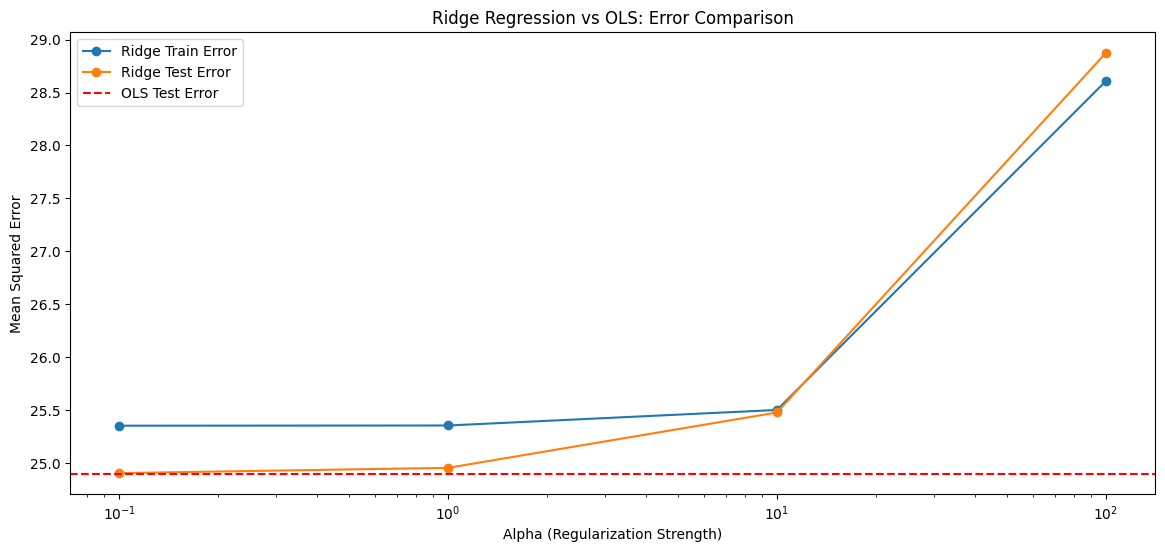

In [5]:
plt.figure(figsize=(14, 6))

# Plot train and test errors
plt.plot(alphas, ridge_train_errors, label="Ridge Train Error", marker='o')
plt.plot(alphas, ridge_test_errors, label="Ridge Test Error", marker='o')
plt.axhline(y=ols_test_error, color='r', linestyle='--', label="OLS Test Error")

plt.xscale("log")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Mean Squared Error")
plt.title("Ridge Regression vs OLS: Error Comparison")
plt.legend()
plt.show()

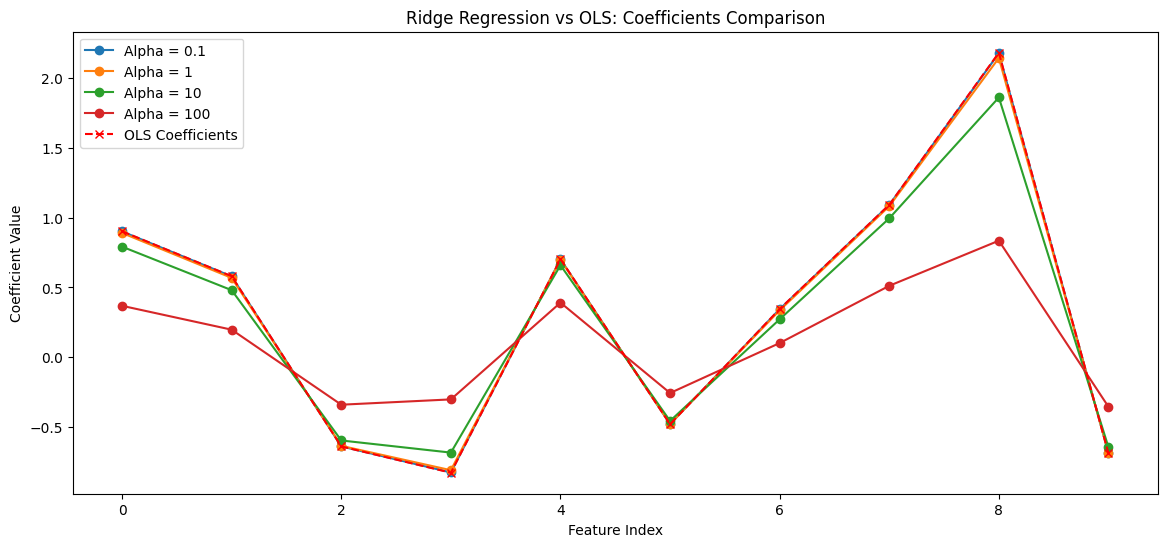

In [6]:
# Plot coefficient magnitudes for different alphas
plt.figure(figsize=(14, 6))

for idx, alpha in enumerate(alphas):
    plt.plot(ridge_coefs[idx], label=f"Alpha = {alpha}", marker='o')

plt.plot(ols_model.coef_, label="OLS Coefficients", marker='x', linestyle='--', color='r')
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Ridge Regression vs OLS: Coefficients Comparison")
plt.legend()
plt.show()